Imports

In [ ]:
import serial
import time
import csv
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Optional: set pandas to show all columns
pd.set_option("display.max_columns", None)


Read sensors and write to csv files

In [10]:
# Adjust port as needed, e.g., "COM3" or "/dev/ttyUSB0"
SERIAL_PORT = "COM4"
BAUD_RATE = 9600
CSV_FILENAME = f"env_data_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"

ser = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
time.sleep(2)  # Wait for Arduino to reset

# Open CSV for writing
with open(CSV_FILENAME, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["timestamp", "environment", "temperature_C", "humidity_percent", "lux"])

    print(f"Logging to {CSV_FILENAME}... Press Ctrl+C to stop.\n")

    try:
        while True:
            line = ser.readline().decode("utf-8", errors="ignore").strip()
            if not line:
                continue
            try:
                parts = line.split(",")
                if len(parts) != 4:
                    print("Skipping malformed line:", line)
                    continue

                channel = int(parts[0])
                temp = float(parts[1])
                humidity = float(parts[2])
                lux = float(parts[3])

                timestamp = datetime.now().isoformat()
                environment = "Environment 1" if channel == 1 else "Environment 2"

                writer.writerow([timestamp, environment, temp, humidity, lux])
                print(f"{timestamp} | {environment} | Temp: {temp:.1f}°C | Hum: {humidity:.1f}% | Lux: {lux:.1f}")
            except ValueError:
                print("Parsing error for line:", line)

    except KeyboardInterrupt:
        print("\nStopped logging.")
        ser.close()


Logging to env_data_20250402_081200.csv... Press Ctrl+C to stop.

Skipping malformed line: Setup complete. Starting loop...
Skipping malformed line: ---------- New Reading Loop ----------
Skipping malformed line: Selecting multiplexer channel 1
Skipping malformed line: Initializing VEML7700...
Skipping malformed line: ⚠️  VEML7700 NOT FOUND on channel 1
Skipping malformed line: Selecting multiplexer channel 2
Skipping malformed line: Initializing VEML7700...
Skipping malformed line: ⚠️  VEML7700 NOT FOUND on channel 2
Skipping malformed line: ---------- New Reading Loop ----------
Skipping malformed line: Selecting multiplexer channel 1
Skipping malformed line: Initializing VEML7700...
Skipping malformed line: ⚠️  VEML7700 NOT FOUND on channel 1
Skipping malformed line: Selecting multiplexer channel 2
Skipping malformed line: Initializing VEML7700...
Skipping malformed line: ⚠️  VEML7700 NOT FOUND on channel 2
Skipping malformed line: ---------- New Reading Loop ----------
Skipping mal

Plot the data

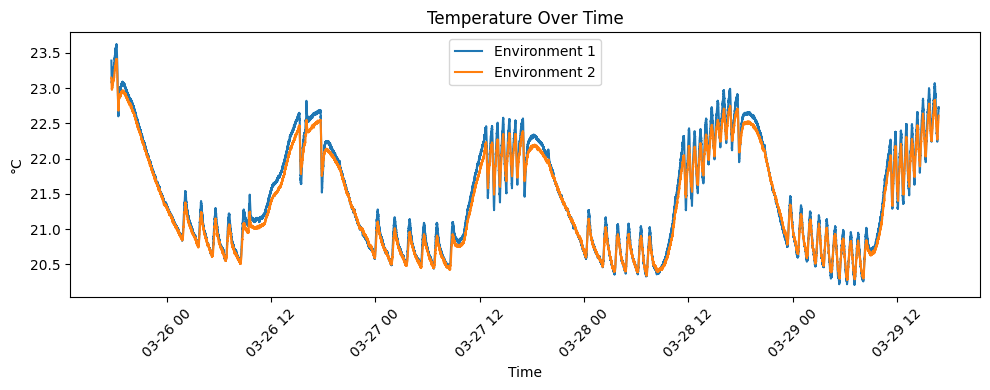

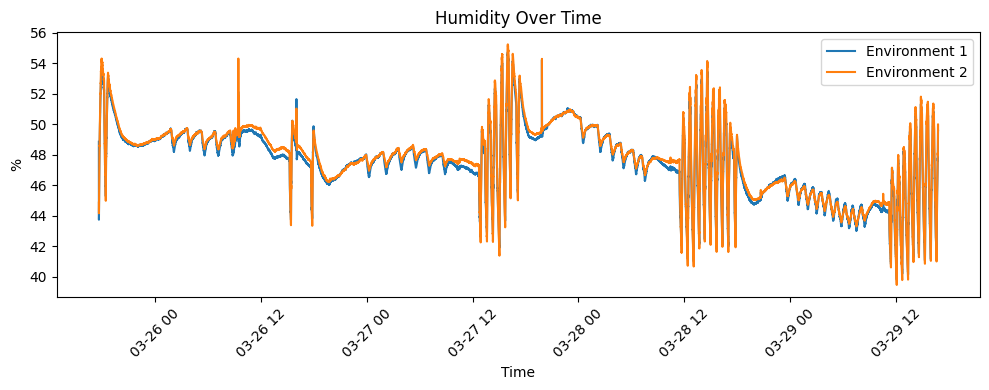

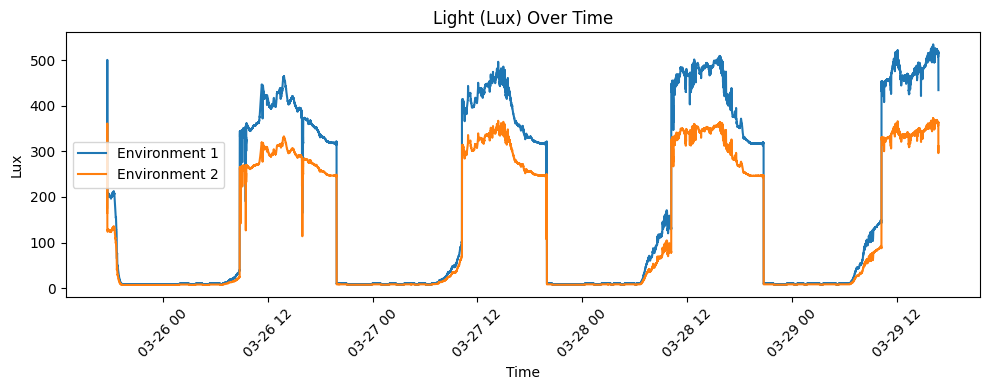

In [ ]:
# Replace with the latest CSV filename or keep reusing one
csv_to_plot = CSV_FILENAME  # or hardcode: 'env_data_20250325_134200.csv'

df = pd.read_csv(csv_to_plot)
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Optional: show first few rows
df.head()

# Plot Temperature
plt.figure(figsize=(10, 4))
for env in df["environment"].unique():
    env_df = df[df["environment"] == env]
    plt.plot(env_df["timestamp"], env_df["temperature_C"], label=env)
plt.title("Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("°C")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Humidity
plt.figure(figsize=(10, 4))
for env in df["environment"].unique():
    env_df = df[df["environment"] == env]
    plt.plot(env_df["timestamp"], env_df["humidity_percent"], label=env)
plt.title("Humidity Over Time")
plt.xlabel("Time")
plt.ylabel("%")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Lux
plt.figure(figsize=(10, 4))
for env in df["environment"].unique():
    env_df = df[df["environment"] == env]
    plt.plot(env_df["timestamp"], env_df["lux"], label=env)
plt.title("Light (Lux) Over Time")
plt.xlabel("Time")
plt.ylabel("Lux")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
